In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import matplotlib.tri as tri
from dataset import *

In [3]:
df_train = pd.read_pickle('microstucture.pkl')
df_train.head()
df_train['shrinkage'] = -df_train['shrinkage']

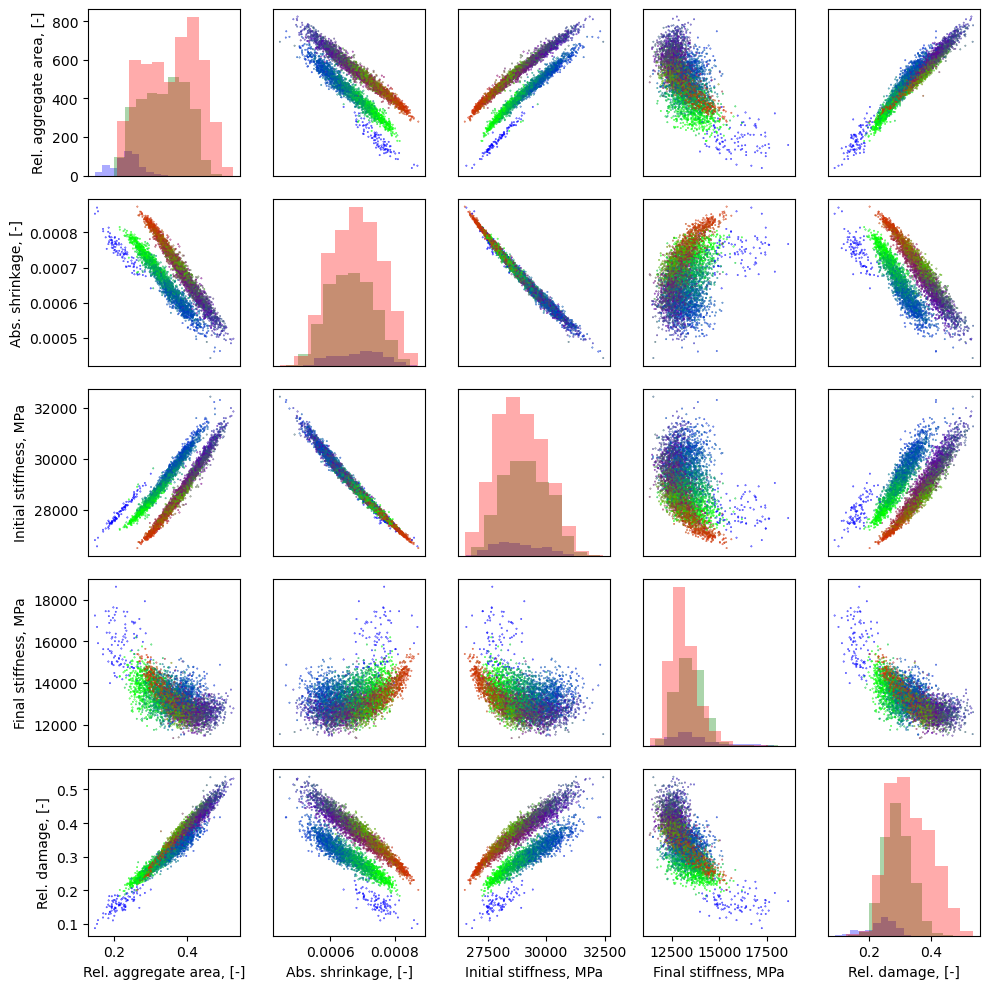

In [4]:
# Create figure
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

# Loop through combinations of variables
for i, col1 in enumerate(['aggregate_ratio', 'shrinkage', 'stiffness_init', 'stiffness_end', 'mortar_damage']):
    for j, col2 in enumerate(['aggregate_ratio', 'shrinkage', 'stiffness_init', 'stiffness_end', 'mortar_damage']):
        if i != j:
            axes[i, j].scatter(df_train[col2][:5000], df_train[col1][:5000], c=df_train[['curve_4','curve_8','curve_16']][:5000].to_numpy(), s=0.1)
        else:
            axes[i, j].hist(df_train[(df_train['curve_8']==0) & (df_train['curve_4']==0)][col1][:5000], bins=10, color='blue', alpha=0.33)
            axes[i, j].hist(df_train[(df_train['curve_8']!=0) & (df_train['curve_4']==0)][col1][:5000], bins=10, color='green', alpha=0.33)
            axes[i, j].hist(df_train[(df_train['curve_4']!=0)][col1][:5000], bins=10, color='red', alpha=0.33)
        
        # Remove labels for cleaner visualization
        if i != 4:
            axes[i, j].set_xticks([])
        if j != 0:
            axes[i, j].set_yticks([])

        # Add labels
        if i == 4:
            axes[i, j].set_xlabel(['Rel. aggregate area, [-]', 'Abs. shrinkage, [-]', 'Initial stiffness, MPa', 'Final stiffness, MPa', 'Rel. damage, [-]'][j])
        if j == 0:
            axes[i, j].set_ylabel(['Rel. aggregate area, [-]', 'Abs. shrinkage, [-]', 'Initial stiffness, MPa', 'Final stiffness, MPa', 'Rel. damage, [-]'][i])

plt.tight_layout()
plt.show()

In [5]:
df = pd.read_pickle('microstucture_big.pkl')
df.head()
df['d_stiffness'] = df['stiffness_1'] - df['stiffness_2'] 

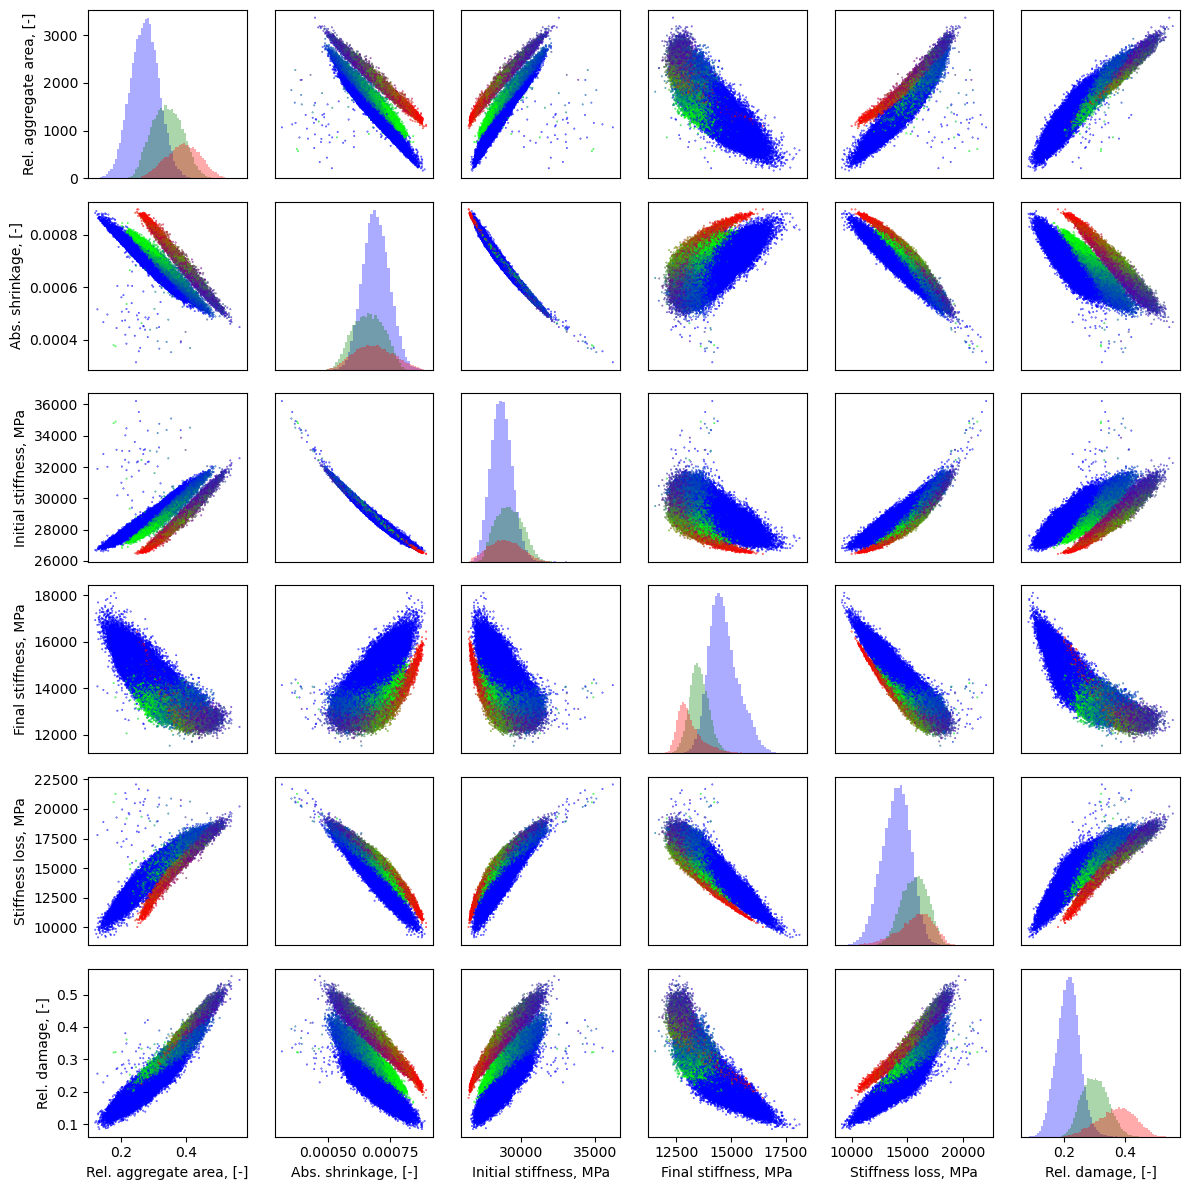

In [50]:
# Create figure
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12, 12))

# Loop through combinations of variables
for i, col1 in enumerate(['aggregate_ratio', 'shrinkage', 'stiffness_1', 'stiffness_2', 'd_stiffness', 'mortar_damage']):
    for j, col2 in enumerate(['aggregate_ratio', 'shrinkage', 'stiffness_1', 'stiffness_2', 'd_stiffness', 'mortar_damage']):
        if i != j:
            axes[i, j].scatter(df[col2], df[col1], c=df[['curve_4','curve_8','curve_16']].to_numpy(), s=0.1)
        else:
            axes[i, j].hist(df[(df['curve_8']==0) & (df['curve_4']==0)][col1], bins=50, color='blue', alpha=0.33)
            axes[i, j].hist(df[(df['curve_8']!=0) & (df['curve_4']==0)][col1], bins=50, color='green', alpha=0.33)
            axes[i, j].hist(df[(df['curve_4']!=0)][col1], bins=50, color='red', alpha=0.33)
        
        # Remove labels for cleaner visualization
        if i != 5:
            axes[i, j].set_xticks([])
        if j != 0:
            axes[i, j].set_yticks([])

        # Add labels
        if i == 5:
            axes[i, j].set_xlabel(['Rel. aggregate area, [-]', 'Abs. shrinkage, [-]', 'Initial stiffness, MPa', 'Final stiffness, MPa', 'Stiffness loss, MPa', 'Rel. damage, [-]'][j])
        if j == 0:
            axes[i, j].set_ylabel(['Rel. aggregate area, [-]', 'Abs. shrinkage, [-]', 'Initial stiffness, MPa', 'Final stiffness, MPa', 'Stiffness loss, MPa', 'Rel. damage, [-]'][i])

plt.tight_layout()
plt.show()

Text(0.9, 0.1, '100% grade 16')

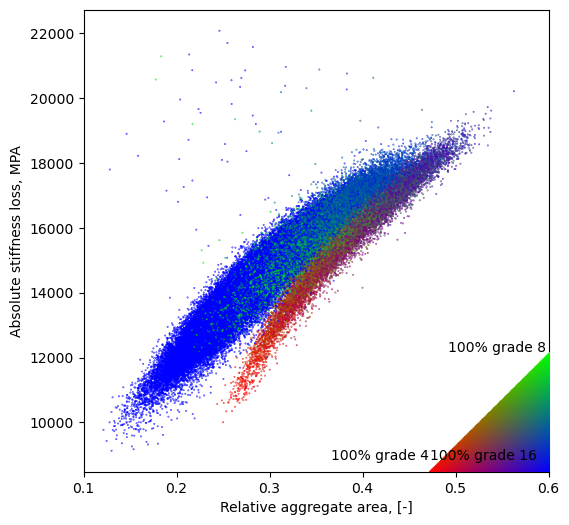

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['stiffness_1']-df['stiffness_2'], s=0.1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('Relative aggregate area, [-]')
ax.set_ylabel('Absolute stiffness loss, MPa')
ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.7, 0.11, 0.20, 0.20])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.0, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.9, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

Text(0.9, 0.1, '100% grade 16')

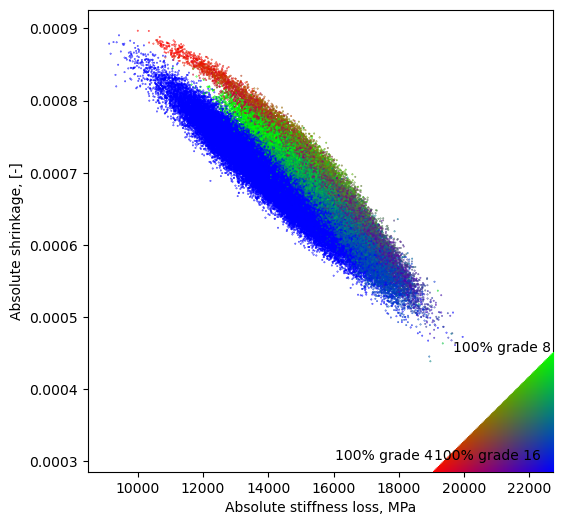

In [54]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['d_stiffness'], df['shrinkage'], s=0.1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('Absolute stiffness loss, MPa')
ax.set_ylabel('Absolute shrinkage, [-]')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.7, 0.11, 0.20, 0.20])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.0, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.9, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

(0.0008, 0.0013)

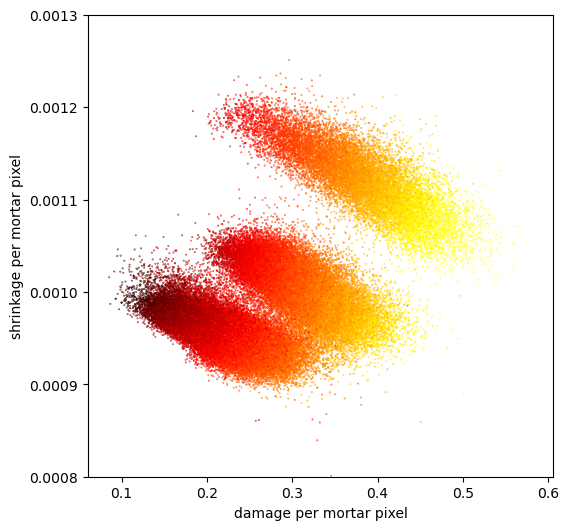

In [81]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['damage']/(1-df['aggregate_ratio']), df['shrinkage']/(1-df['aggregate_ratio']), s=0.1, c=df['aggregate_ratio'], cmap='hot')
ax.set_xlabel('damage per mortar pixel')
ax.set_ylabel('shrinkage per mortar pixel')
ax.set_ylim([0.0008, 0.0013])

Text(0.9, 0.1, '100% grade 16')

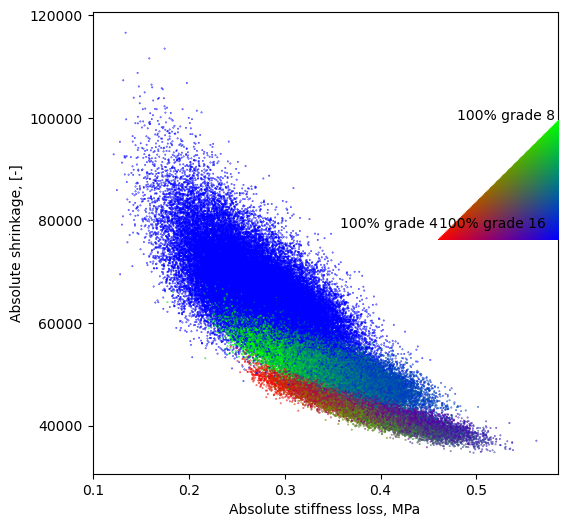

In [69]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['d_stiffness']/df['mortar_damage'], s=0.1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('Absolute stiffness loss, MPa')
ax.set_ylabel('Absolute shrinkage, [-]')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([1.5e7, 3e7])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.7, 0.5, 0.20, 0.20])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.0, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.9, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

In [40]:
cluster_1 = df[(df['curve_8']==0) & (df['curve_4']==0)]
cluster_2 = df[(df['curve_8']!=0) & (df['curve_4']==0)]
cluster_3 = df[(df['curve_4']!=0)]

Text(0, 0.5, 'Absolute stiffness loss, MPa')

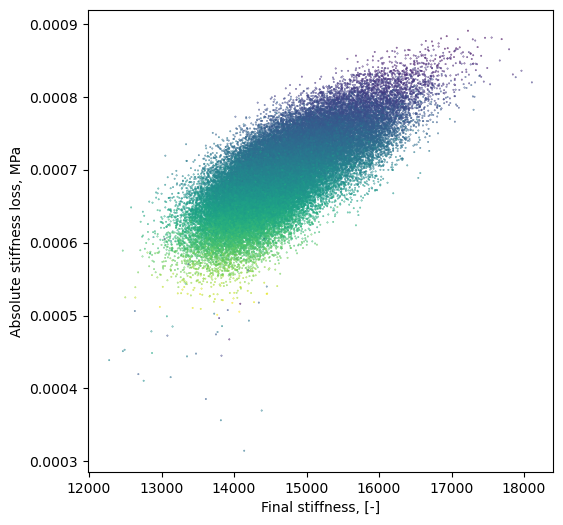

In [45]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(cluster_1['stiffness_2'], cluster_1['shrinkage'],  s=0.1, c=cluster_1['aggregate_ratio'].to_numpy())
ax.set_xlabel('Final stiffness, [-]')
ax.set_ylabel('Absolute stiffness loss, MPa')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['damage'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('total relative aggregate volume')
ax.set_ylabel('damage')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.65, 0.11, 0.25, 0.25])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.1, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.98, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

In [6]:
cluster_1 = df[(df['curve_8']==0) & (df['curve_4']==0)]
cluster_2 = df[(df['curve_8']!=0) & (df['curve_4']==0)]
cluster_3 = df[(df['curve_4']!=0)]

In [8]:
X = np.array(cluster_1[['aggregate_ratio']])
Y = np.array(cluster_1[['shrinkage']]) / (0.0001)
reg1 = LinearRegression().fit(X, Y)
x = np.linspace(0, 1, 10)
y = reg1.predict(x.reshape(-1,1)) * (0.0001)
print(reg1.score(X, Y))
a = reg1.coef_
b = reg1.intercept_

0.9481532297872133


Text(0, 0.5, 'shrinkage')

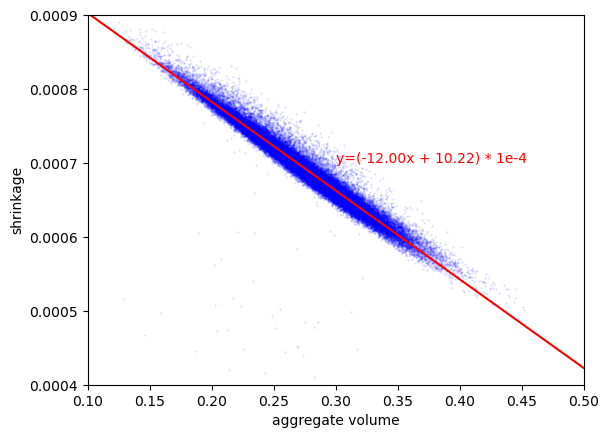

In [14]:
plt.scatter(cluster_1['aggregate_ratio'], cluster_1['shrinkage'], s=0.5, c='blue', alpha=0.1)
plt.plot(x, y, c='red')
plt.xlim([0.1, 0.5])
plt.ylim([0.0004, 0.0009])
plt.text(0.3, 0.0007, f'y=({a[0,0]:1.2f}x + {b[0]:1.2f}) * 1e-4', color='red')
plt.xlabel('aggregate volume')
plt.ylabel('shrinkage')

In [89]:
v_i = 0.5 * np.sqrt(cluster_1['aggregate_ratio'] / cluster_1['curve_n'].str[0] / np.pi) 
i = 2 * np.sqrt(cluster_1['aggregate_ratio'] * cluster_1['curve_n'].str[0] * np.pi)

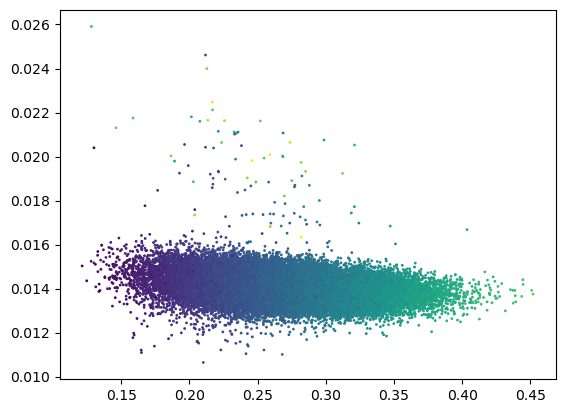

In [93]:
plt.scatter(cluster_1['aggregate_ratio'], cluster_1['interface']/i, s=1, c=cluster_1['shrinkage'])

In [171]:
X = np.array(cluster_2[['aggregate_ratio', 'curve_16']])
X[:,1] = X[:,0] * X[:,1]
Y = np.array(cluster_2[['shrinkage']]) / (0.0001)
reg2 = LinearRegression().fit(X, Y)
x = np.meshgrid(np.linspace(0.2, 0.5, 10), np.linspace(0, 0.45, 10))
x = np.vstack((x[0].flatten(), x[1].flatten())).T
y = reg2.predict(x) * (0.0001)
print(reg2.score(X, Y))
a = reg2.coef_
b = reg2.intercept_

0.927080102437172


Text(0.22, 0.4, 'z = (8.82x + 1.67y - 9.77) * 1e-4')

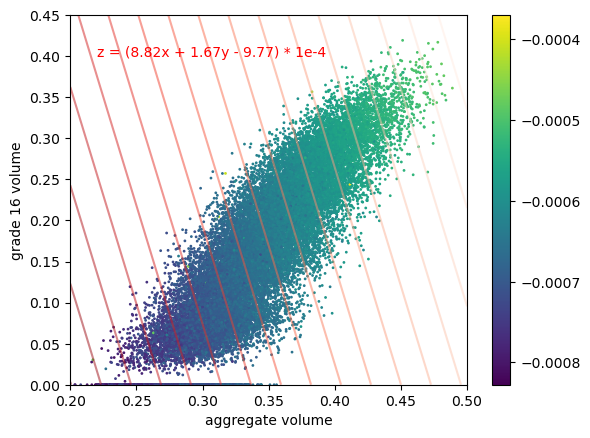

In [177]:
plt.scatter(cluster_2['aggregate_ratio'], cluster_2['curve_16']*cluster_2['aggregate_ratio'], s=1, c=cluster_2['shrinkage'])
plt.colorbar()
plt.tricontour(x[:,0], x[:,1], y.flatten(), levels=20, cmap='Reds_r', alpha=0.5)
plt.xlim([0.2, 0.5])
plt.ylim([0, 0.45])
plt.xlabel('aggregate volume')
plt.ylabel('grade 16 volume')
plt.text(0.22, 0.4, f'z = ({a[0,0]:1.2f}x + {a[0,1]:1.2f}y - {-b[0]:1.2f}) * 1e-4', color='red')

In [186]:
X = np.array(cluster_3[['aggregate_ratio', 'curve_4']])
X[:,1] = X[:,0] * X[:,1]
Y = np.array(cluster_3[['shrinkage']]) / (0.0001)
reg3 = LinearRegression().fit(X, Y)
x = np.meshgrid(np.linspace(0.25, 0.55, 10), np.linspace(0.05, 0.3, 10))
x = np.vstack((x[0].flatten(), x[1].flatten())).T
y = reg3.predict(x) * (0.0001)
print(reg3.score(X, Y))
a = reg3.coef_
b = reg3.intercept_

0.9483581842828928


Text(0.35, 0.27, 'z = (12.73x - 1.39y - 11.48) * 1e-4')

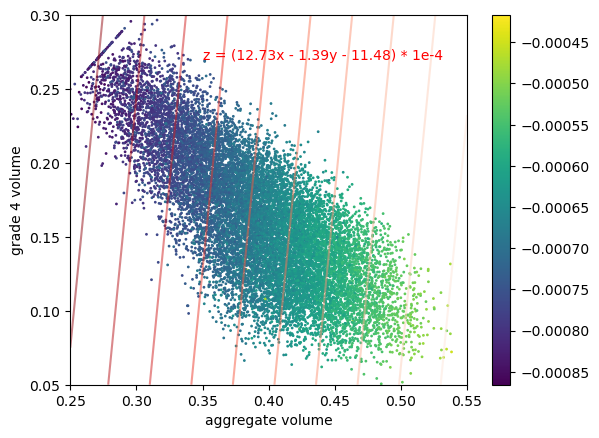

In [192]:
plt.scatter(cluster_3['aggregate_ratio'], cluster_3['curve_4']*cluster_3['aggregate_ratio'], s=1, c=cluster_3['shrinkage'])
plt.colorbar()
plt.tricontour(x[:,0], x[:,1], y.flatten(), levels=10, cmap='Reds_r', alpha=0.5)
plt.xlim([0.25, 0.55])
plt.ylim([0.05, 0.3])
plt.xlabel('aggregate volume')
plt.ylabel('grade 4 volume')
plt.text(0.35, 0.27, f'z = ({a[0,0]:1.2f}x - {-a[0,1]:1.2f}y - {-b[0]:1.2f}) * 1e-4', color='red')